In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import sympy as sp

# Biophysical Chemistry Problem Set 7
## Secret Code #20
### Problem 1

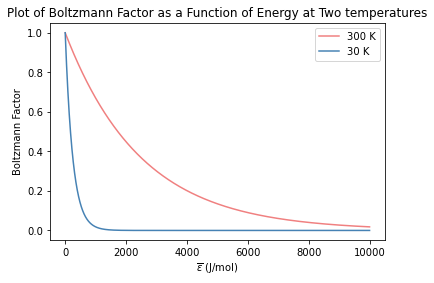

In [2]:
energies = np.arange(0, 10000, 1)

def Boltzmann(energy, temperature):
    R = 8.3145 #J/mol K
    return np.exp(-energy/(R*temperature))


plt.plot(energies, Boltzmann(energies, 300), color='lightcoral', label='300 K')
plt.plot(energies, Boltzmann(energies, 30), color='steelblue', label='30 K')
plt.legend()
plt.title('Plot of Boltzmann Factor as a Function of Energy at Two temperatures')
plt.xlabel('$\overline{\epsilon}$ (J/mol)')
plt.ylabel('Boltzmann Factor');

### Problem 2    
> The high temperature limit of each these curve is 1. The temperature at which all of the Boltzmann Factors achieve half of their maximum (1) is described as T$_\frac{1}{2}$ = -R * ln(0.5) / $\overline{\epsilon}$

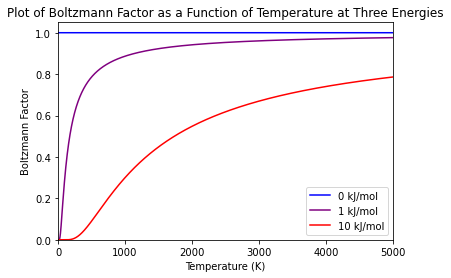

In [3]:
temperatures = np.arange(1, 5000, 1)

plt.plot(temperatures, Boltzmann(0, temperatures), label='0 kJ/mol', color='blue')
plt.plot(temperatures, Boltzmann(1000, temperatures), label='1 kJ/mol', color='purple')
plt.plot(temperatures, Boltzmann(10000, temperatures), label='10 kJ/mol', color='red')
plt.legend()
plt.axis([0,5000,0,1.05])
plt.title('Plot of Boltzmann Factor as a Function of Temperature at Three Energies')
plt.xlabel('Temperature (K)')
plt.ylabel('Boltzmann Factor');

### Problem 3    
> The higher energy states require more thermal energy to become accessible to the particle. This is reflected in that the ground state is accessible at all temperatures. Once the Temperature exceeds around 50K (very low threshold), the 1 kJ/mol energy level becomes accessible because the particle at that point has the small amount of thermal energy reqired to move itself into that higher energy state. The 10 kJ/mol energy state requires significantly higher temperature and thus the thermal energy required for the system to access the energy level is much higher than the others.

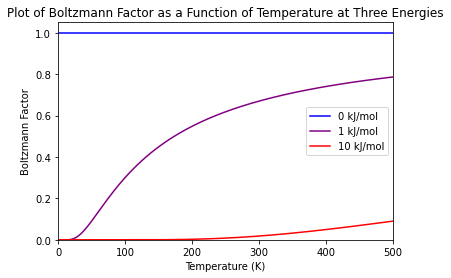

In [4]:
plt.plot(temperatures, Boltzmann(0, temperatures), label='0 kJ/mol', color='blue')
plt.plot(temperatures, Boltzmann(1000, temperatures), label='1 kJ/mol', color='purple')
plt.plot(temperatures, Boltzmann(10000, temperatures), label='10 kJ/mol', color='red')
plt.legend()
plt.axis([0,500,0,1.05])
plt.title('Plot of Boltzmann Factor as a Function of Temperature at Three Energies')
plt.xlabel('Temperature (K)')
plt.ylabel('Boltzmann Factor');

### Problem 4    
> The low-temperature limit of q is 1 [lim q as T approaches 0 = (1 + 1/e^inf 1/e^inf ) = 1], the high-temperature limit of 1 is 3 [lim 1 as T approaches inf = (1 + 1/e^0 + 1/e^0) = 3].

Text(0.5, 1.0, 'Plot of Canonical Partition Function for Single Molecule as\na Function of Temperature over 3 Energy States {0, 1, 10} kJ/mol ')

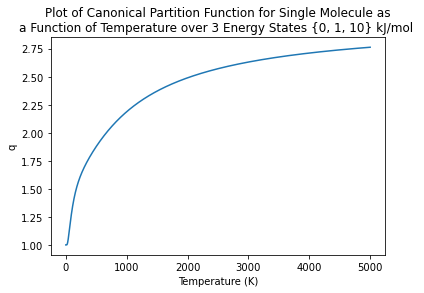

In [5]:
def q_three_state(temperature):
    return Boltzmann(0, temperature) + Boltzmann(1000, temperature) + Boltzmann(10000, temperature)

plt.plot(temperatures, q_three_state(temperatures))
plt.ylabel('q')
plt.xlabel('Temperature (K)')
plt.title('Plot of Canonical Partition Function for Single Molecule as\na Function of Temperature over 3 Energy States {0, 1, 10} kJ/mol ')

### Problem 5     
> The low temperature limits for the non-ground state energy-levels are zero because there is not enough thermal energy to access any energy levels other than the zero energy ground state. Therefore and as we see, the low energy limit for the ground energy state is 1 as it makes up the entire population. The high temperature limit of the energy states is 1/3 because at all of the energy levels are equally populated. The population of the ground state will always exceed this limit while higher energy states will never exceed this limit. This is because the ground-state energy has a population of 1 at T=0 and approaches 1/3 as T approaches infinity the higher energy states start at a population of 0 at T=0 and approach 1/3 as T approaches infinity.

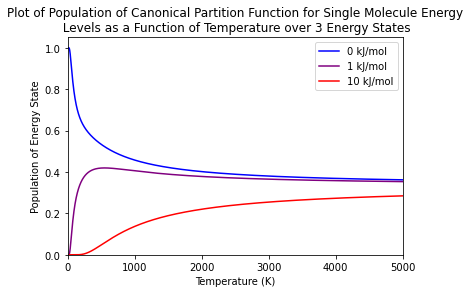

In [6]:
def population_i(energy_level, temperature):
    BF = Boltzmann(energy_level, temperature)
    return BF / q_three_state(temperature)

plt.plot(temperatures, population_i(0, temperatures), label='0 kJ/mol', color='blue')
plt.plot(temperatures, population_i(1000, temperatures), label='1 kJ/mol', color='purple')
plt.plot(temperatures, population_i(10000, temperatures), label='10 kJ/mol', color='red')

plt.ylabel('Population of Energy State')
plt.xlabel('Temperature (K)')
plt.title('Plot of Population of Canonical Partition Function for Single Molecule Energy\n Levels as a Function of Temperature over 3 Energy States')
plt.legend()

plt.axis([0,5000,0,1.05]);

### Problem 6

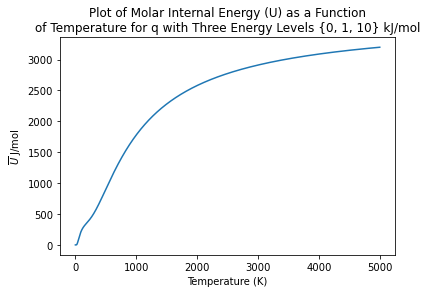

In [7]:
def Molar_U(temperature):
    R = 8.3145 #J/mol K
    num = 1000*np.exp(-1000/(R*temperature)) + 10000*np.exp(-10000/(R*temperature))
    U_bar = num/q_three_state(temperature)
    return U_bar

plt.plot(temperatures, Molar_U(temperatures))
plt.ylabel('$\overline{U}$ J/mol')
plt.xlabel('Temperature (K)')
plt.title('Plot of Molar Internal Energy (U) as a Function\nof Temperature for q with Three Energy Levels {0, 1, 10} kJ/mol');

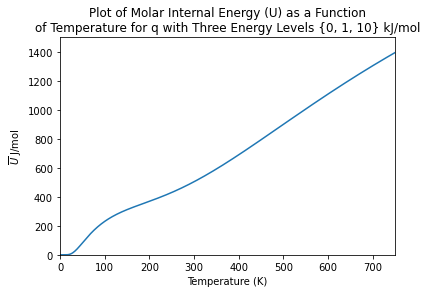

In [8]:
plt.plot(temperatures, Molar_U(temperatures))
plt.axis([0, 750, 0, 1500])
plt.ylabel('$\overline{U}$ J/mol')
plt.xlabel('Temperature (K)')
plt.title('Plot of Molar Internal Energy (U) as a Function\nof Temperature for q with Three Energy Levels {0, 1, 10} kJ/mol');

### Problem 7

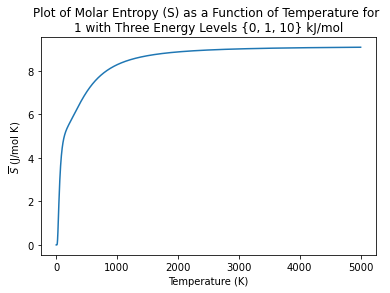

In [9]:
def Molar_S(temperature):
    R = 8.3145 #J/mol K
    U = np.array(Molar_U(temperature))
    S_bar = U/temperature + R*np.log(q_three_state(temperature))
    return S_bar

plt.plot(temperatures, Molar_S(temperatures))
plt.title('Plot of Molar Entropy (S) as a Function of Temperature for \n1 with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{S}$ (J/mol K)');

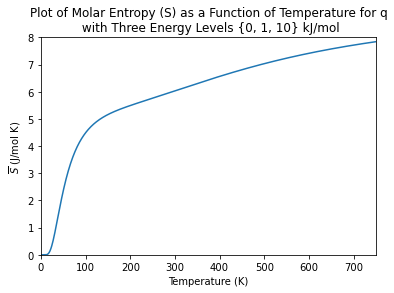

In [10]:
plt.plot(temperatures, Molar_S(temperatures))
plt.axis([0, 750, 0, 8])
plt.title('Plot of Molar Entropy (S) as a Function of Temperature for q\n with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{S}$ (J/mol K)');

### Problem 8

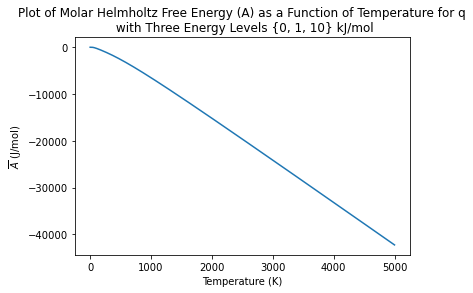

In [11]:
def Molar_A(temperature):
    R = 8.3145 #J/molK
    return -R*temperature*np.log(q_three_state(temperature))

plt.plot(temperatures, Molar_A(temperatures))
plt.title('Plot of Molar Helmholtz Free Energy (A) as a Function of Temperature for q\n with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{A}$ (J/mol)');

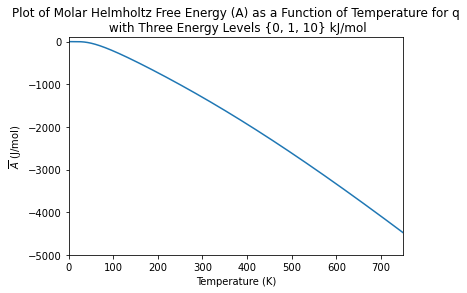

In [12]:
plt.plot(temperatures, Molar_A(temperatures))
plt.axis([0, 750, -5000, 100])

plt.title('Plot of Molar Helmholtz Free Energy (A) as a Function of Temperature for q\n with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{A}$ (J/mol)');

### Problem 9

In [13]:
'''def Molar_Cv(T):
    R = 8.3145 #J/molK    
    return ((100000000*np.exp(-1000/(R*T))) + (81000000*np.exp(-11000/(R*T))) + (1000000*np.exp(-1000/(R*T)))) / ((R*T**2)*((1 + np.exp(-1000/(R*T)) + np.exp(-10000/(R*T)))**2))
plt.plot(temperatures, Molar_Cv(temperatures))
plt.title('Plot of Molar $C_v$ as a Function of Temperature for q\n with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{C_v}$ (J/mol K)');'''

'''plt.plot(temperatures, Molar_Cv(temperatures))
plt.axis([0, 750, 0, 380])
plt.title('Plot of Molar $C_v$ as a Function of Temperature for q\n with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{C_v}$ (J/mol K)');''';

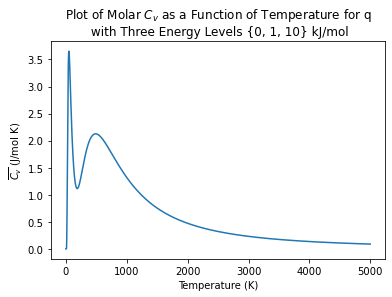

In [14]:
def C_V(T):
    ''' C_V = dU/dT at constant v'''
    out = misc.derivative(Molar_U, T, dx=.001)
    return out

plt.plot(temperatures, C_V(temperatures))
plt.title('Plot of Molar $C_v$ as a Function of Temperature for q\n with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{C_v}$ (J/mol K)');

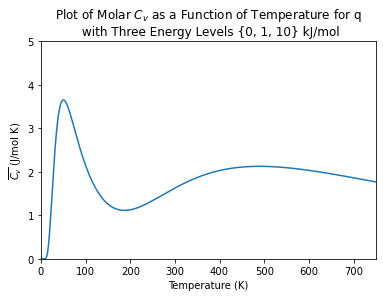

In [15]:
plt.plot(temperatures, C_V(temperatures))
plt.axis([0, 750, 0, 5])
plt.title('Plot of Molar $C_v$ as a Function of Temperature for q\n with Three Energy Levels {0, 1, 10} kJ/mol')
plt.xlabel('Temperature (K)')
plt.ylabel('$\overline{C_v}$ (J/mol K)');

### Question 10

##### 10.E

In [16]:
def zipper(k,tau):
    n = 4
    num = (k*tau)**(n+1) - n*k*tau - k*tau + n
    den = (k*tau - 1)**2
    out = 1 + k*(num/den)
    return out
k = 0.00164
tau = 5e3
zipp = zipper(k, tau)
print('the value of the zipper model partition functtion is:', zipp)

the value of the zipper model partition functtion is: 2.1716947199999996


##### 10.F

In [17]:
leftout = 2*(k**3)*tau + 3*(k**2)
print('the value of the partition function left out is:', leftout)

the value of the partition function left out is: 5.2178240000000004e-05


##### 10G

In [18]:
K, t = sp.symbols('K t')
w = sp.Matrix([[K*t, 1],[K, 1]])
n = sp.Matrix([[0, 1]])
c = sp.Matrix([[1],[1]])
rho4 = n*w**4*c
rho4simple = sp.simplify(rho4[0])
rho4lamb = sp.lambdify([K, t], rho4simple)
totalrho = rho4lamb(k, tau)

In [19]:
c4 = 1/totalrho
print('c4:', c4)
c3h = (4*k)/totalrho
print('c3h:', c3h)
c2h2 = ((3*(k**2)*tau) + 3*k**2)/totalrho
print('c2h2:', c2h2)
ch3 = ((2*(k**3)*(tau**2)) + (2*k**3*tau)) / totalrho
print('ch3:',ch3)
h4 = ((k**4)*(tau**3)) / totalrho
print('h4:',h4)
print('sum:', c4+c3h+c2h2+ch3+h4)

c4: 0.4604588135064945
c3h: 0.0030206098166026037
c2h2: 0.018580465722180434
ch3: 0.10157321261458638
h4: 0.4163668983401361
sum: 1.0


##### 10H

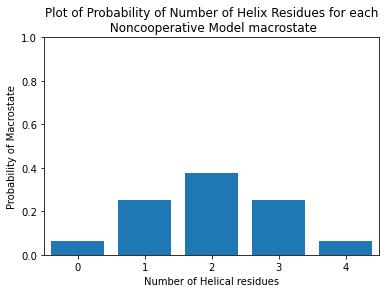

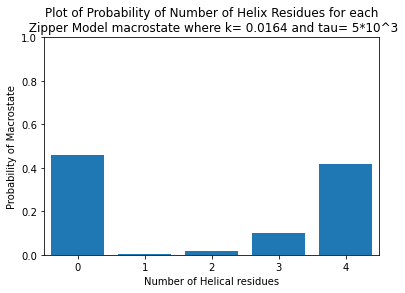

In [20]:
xs = np.array(range(5))
noncoop_ys = np.array([1/16, 1/4, 3/8, 1/4, 1/16])
zipper_ys = np.array([c4, c3h, c2h2, ch3, h4])

fig1 = plt.figure()
plt.bar(xs, noncoop_ys)
plt.axis([-.5,4.5,0,1]);
plt.title('Plot of Probability of Number of Helix Residues for each\n Noncooperative Model macrostate')
plt.xlabel('Number of Helical residues')
plt.ylabel('Probability of Macrostate')


fig2 = plt.figure()
plt.bar(xs, zipper_ys)
plt.axis([-.5,4.5,0,1])
plt.title('Plot of Probability of Number of Helix Residues for each\n Zipper Model macrostate where k= 0.0164 and tau= 5*10^3')
plt.xlabel('Number of Helical residues')
plt.ylabel('Probability of Macrostate');

##### 10I

In [21]:
noncoop_fraction_helix = 1/(1+1)
print('when k=1 noncooperative fraction helix =', noncoop_fraction_helix)

when k=1 noncooperative fraction helix = 0.5


In [24]:
fh4 = (k/(4*rho4simple))*sp.diff(rho4simple, K)
fh4lamb = sp.lambdify([K, t], fh4)
zipper_fraction_helix = fh4lamb(k, tau)
print(f'when k = {k} and tau = {tau}, zipper fraction helix = ', zipper_fraction_helix)

when k = 0.00164 and tau = 5000.0, zipper fraction helix =  0.5025921931163168
